In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker

In [2]:
full_data = pd.read_csv('added_rows.csv',delimiter=',')

In [3]:
full_data=full_data.drop(['id','title','original_language','release_dates','production_companies','production_countries','cast'
                         ,'crew','keywords','popularity','contentRating','collection'],axis=1)

In [4]:
full_data['release_date']=full_data['release_date'].str[:-6]
full_data = full_data[pd.notnull(full_data['release_date'])]
full_data['release_date']=(full_data['release_date']).astype(int)
full_data=full_data.fillna(full_data.mean())

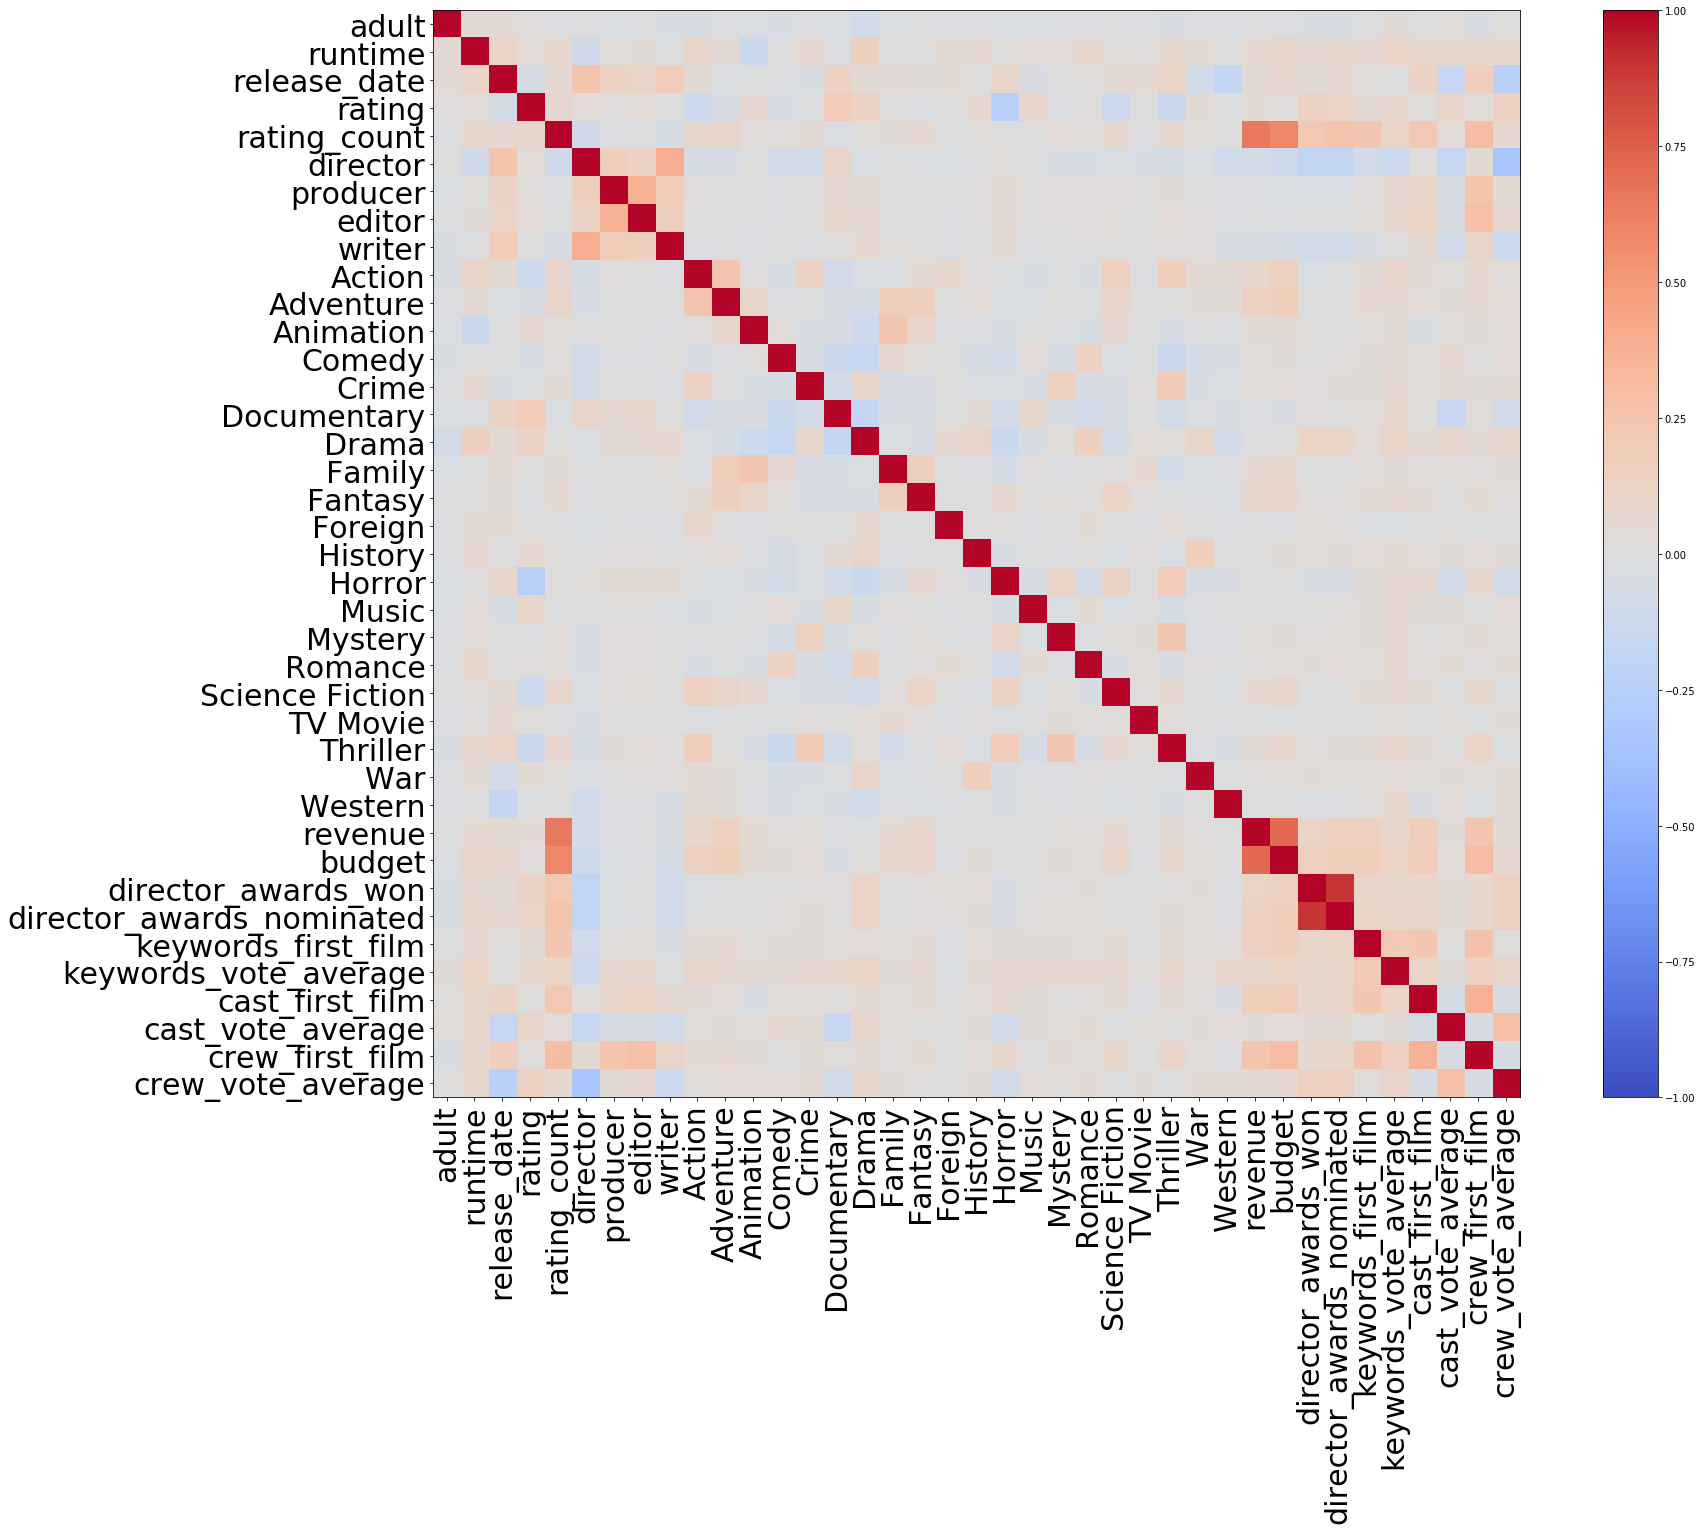

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(30)

image=ax.matshow(full_data.corr(),interpolation='nearest', cmap=cm.coolwarm,vmin=-1, vmax=1)
colorbar=fig.colorbar(image)

labels=list(full_data.columns)

ax.set_xticklabels([''] + labels,fontsize=30)
ax.set_yticklabels([''] + labels,fontsize=30)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
od=plt.xticks(rotation='vertical')

In [5]:
from sklearn import preprocessing

numpy_arrays = full_data.values 
headers=list(full_data.columns.values)
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(numpy_arrays)
reg_data = pd.DataFrame(scaled)
reg_data.columns=headers

C:\Users\fiare\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV

# x_val=[list(a) for a in zip(reg_data['runtime'],reg_data['release_date'],reg_data['adult']
#                             ,reg_data['keyword_score'],reg_data['cast_score'],reg_data['crew_score'])]
x_val=reg_data.drop('rating', axis=1)

rating=reg_data['rating']
train,test, rating_train, rating_test = train_test_split(x_val, rating, test_size=0.3, random_state=0)

C:\Users\fiare\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\fiare\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
wood = RandomForestRegressor(n_estimators=50,max_depth=20, random_state=0)
wood.fit(train, rating_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
rating_pred = wood.predict(test)

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(rating_test, rating_pred))
print("RMSE:"+str(rms))
print("R2:"+str(wood.score(test,rating_test)))
print(np.corrcoef(rating_test,rating_pred))

RMSE:0.10901085505611782
R2:0.4089253327650457
[[1.         0.63968236]
 [0.63968236 1.        ]]


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import metrics

models = [
    RandomForestRegressor(n_estimators=50,max_depth=20, random_state=0),
    linear_model.SGDRegressor(max_iter=100,random_state=0),
    linear_model.LinearRegression(),
    linear_model.Ridge (alpha = 0.1,random_state=0),
    linear_model.Lasso(alpha = 0.1,random_state=0),
    linear_model.ElasticNet(random_state=0)
#     SVR(kernel='rbf'),
     
]
#metric = 'r2'
for model in models:
    name = model.__class__.__name__
    model.fit(train,rating_train)
    pred = model.predict(test)
    
    
    print('Classifier: '+name)
    print("Explained variance: "+str(metrics.explained_variance_score(rating_test,pred)))
    print("Mean absolute error: "+str(metrics.mean_absolute_error(rating_test,pred)))
    print("Mean squared error: "+str(metrics.mean_squared_error(rating_test,pred)))
    rms = sqrt(mean_squared_error(rating_test, pred))
    print("RMSE:"+str(rms))
    print("Mean squared logarithmic error: "+str(metrics.mean_squared_log_error(rating_test,pred)))
    print("Median absolute error: "+str(metrics.median_absolute_error(rating_test,pred)))
    print("R2 score: "+str(metrics.r2_score(rating_test,pred)))
    
  
   
    #print(cross_val_score(model, x_val, rating, scoring=metric))
  


Classifier: RandomForestRegressor
Explained variance: 0.40907981452722675
Mean absolute error: 0.08170156969125829
Mean squared error: 0.011883366520065927
RMSE:0.10901085505611782
Mean squared logarithmic error: 0.005140088972040495
Median absolute error: 0.06289021934919672
R2 score: 0.4089253327650457
Classifier: SGDRegressor
Explained variance: 0.18079576355742755
Mean absolute error: 0.0992313584213555
Mean squared error: 0.016471279487743073
RMSE:0.12834048265353795
Mean squared logarithmic error: 0.007093503313931201
Median absolute error: 0.07970662899071618
R2 score: 0.1807240796863302
Classifier: LinearRegression
Explained variance: 0.18501894665815533
Mean absolute error: 0.09840361001801526
Mean squared error: 0.016385586204333395
RMSE:0.12800619596071666
Mean squared logarithmic error: 0.00703403563884161
Median absolute error: 0.07840933614394266
R2 score: 0.18498643487752287
Classifier: Ridge
Explained variance: 0.1851800551113434
Mean absolute error: 0.09841131052627525

In [ ]:

# ‘explained_variance’	metrics.explained_variance_score	 
# ‘neg_mean_absolute_error’	metrics.mean_absolute_error	 
# ‘neg_mean_squared_error’	metrics.mean_squared_error	 
# ‘neg_mean_squared_log_error’	metrics.mean_squared_log_error	 
# ‘neg_median_absolute_error’	metrics.median_absolute_error	 
# ‘r2’	metrics.r2_score

In [ ]:
param_grid = { 
    #'n_estimators': [20,30,40],
   # 'max_depth':[10,20,30]
    'n_estimators': [50,60],
    'max_depth':[20],
    #'max_features': ['sqrt', 'log2'],
   # 'criterion': ['mse', 'mae']
}

CV_rfc = GridSearchCV(estimator=wood, param_grid=param_grid,n_jobs=8,verbose = 5)
CV_rfc.fit(test, rating_test)
print (CV_rfc.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=8)]: Done   3 out of   6 | elapsed:   34.9s remaining:   34.9s
